<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 02
## Clase 06: Desarrollo de Algoritmos

## Objetivos

* Conocer las etapas al desarrollar un algoritmo
* Aprender a empaquetar funciones y objetos.
* Conocer las funciones más eficientes

## Contenidos
* [Desarrollo de Software](#soft_dev)
* [Módulos en Python](#modules)
* [Fast-Pandas](#fast-pandas)

<a id='soft_dev'></a>
## Desarrollo de Software

A la hora de desarrollar software (de todo tipo, ya sea, aplicaciones móviles, aplicaciones web, librerías, etc.) se dispone de una serie de etapas para una correcta puesta en marcha. Estas etapas típicamente están caracterizadas por el ambiente en el que se ejecutan.

### Ejemplo

Considera que estás desarrollando un algoritmo de reconocimiento facial que luego agranda tus ojos y agrega pecas, todo con la finalidad de crear un _nuevo_ filtro para Instagram. Los ambientes de desarrollo serían:

* __Local:__ Tu propio computador, donde desarrollas el algoritmo y haces las primeras pruebas, con un par de fotos o videos, nada muy costoso computacionalmente.
* __Development:__ Servidor con acceso a los desarrolladores, ya sea de _backend_, _frontend_, _data base_, _integration_, _algorithmic_. En esta etapa ya es necesario que todas las partes del producto se comuniquen entre ellas. Por ejemplo, que al hacer click en el filtro el algoritmo se ejecute. Aquí se pueden hacer pruebas sin miedo a que el producto deje de funcionar por cambios en el código.
* __Test:__ Un servidor con acceso solo para tu equipo de trabajo, en el que harán pruebas de estress, ya sea para el algoritmo como para la aplicación. 
* __QA:__ En ocasiones se disponibiliza un servidor con acceso al usuario final, con tal que el pueda realizar pruebas. Esto con la finalidad de evitar el sesgo del equipo que desarrolló el producto.
* __Production:__ Servidor final, donde todos los usuarios utilizan el producto. Debe ser capaz de soportar todas las pruebas anteriores y la cantidad de usuarios para la que fue desarrollado. Por ejemplo, debe soportar que millones de personas utilizen el filtro al mismo tiempo.

<a id='modules'></a>
## Módulos en Python

Como matemático, es muy probable que el día de mañana debas desarrollar un algoritmo, en `Python` la forma de reutilizar y compartir código es a partir de _Modules_ y _Packages_. De la [documentación oficial](https://docs.python.org/3/tutorial/modules.html) tenemos que:

* __Module__: A module is a file containing Python definitions and statements. The file name is the module name with the suffix `.py` appended.
* __Package__: Packages are a way of structuring Python’s module namespace by using “dotted module names”.

Un ejemplo de módulo es el archivo `Benchmarker.py` en el directorio `fast_pandas`. En el que se define una clase `Benchmarker` que cuenta con métodos para realizar _benchmarks_ de funciones que se aplican a dataframes de `pandas`. Veámoslo!

Un ejemplo de paquete es pandas, al tenerlo instalado es posible acceder a él y a la colección de módulos que posee. 

A continuación veremos un directorio de un proyecto, en el que se crea un paquete con la posibilidad de instalarlo.

<a id='modules'></a>
## Fast-Pandas

Esta sección está basada en el repositorio https://github.com/mm-mansour/Fast-Pandas, donde se analizan diferentes tareas realizadas de diferente manera, en muchas ocasiones se comparan las funciones por defecto de `pandas` vs `numpy`. 

In [2]:
import os
import numpy as np
import pandas as pd

Utilizaremos como ejemplo un dataset de gasto fiscal neto en Chile, obtenidos de una [datathon de DataCampfire](https://datacampfire.com/datathon/).

In [5]:
gasto = pd.read_csv(os.path.join("data", "gasto_fiscal.csv"), sep=";")
gasto.head()

,anio,mes,partida,capitulo,programa,subtitulo,monto
0,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,21082
1,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,BIENES Y SERVICIOS DE CONSUMO,152607
2,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,GASTOS EN PERSONAL,552668
3,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,INICIATIVAS DE INVERSIÓN,4741
4,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Proyecto Fortalecimiento Institucional,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,26107


Las variables corresponden a:

* anio: Año del periodo
* mes: Mes del periodo
* partida: Ministerio
* capítulo: Servicio Público
* programa: Programa
* subtitulo: Primer nivel de clasificación para el presupuesto
* monto: Cantidad de millones de pesos chilenos (CLP) actualizada según inflación.

### Eliminar columnas duplicadas

Por ejemplo, si deseamos eliminar filas duplicadas según la columna programa, tenemos varias alternativas, veamos cuanto demoran.

In [10]:
%%timeit
gasto[~gasto["programa"].duplicated(keep="first")].reset_index(drop=True)

3.05 ms ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%%timeit
gasto.drop_duplicates(subset="programa", keep="first").reset_index(drop=True)

12 ms ± 328 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
gasto.groupby(gasto["programa"], as_index=False, sort=False).first()

52.6 ms ± 512 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


La pregunta natural que surge es:

__¿Podemos sacar conclusiones de rendimiento solo con un dataset?__

La respuesta, por increíble que parezca, es __NO__. Por lo que utilizaremos la clase `Benchmarker` para realizar las pruebas con distintos tamaños y además entregar información gráfica.

Benchmarking function:  duplicated
	Testing with a dataframe of size:  100
	Result (seconds):  0.0005482233499998983
	Testing with a dataframe of size:  1000
	Result (seconds):  0.0006224645300000702
	Testing with a dataframe of size:  10000
	Result (seconds):  0.0008002334000011614
Benchmarking function:  drop_duplicates
	Testing with a dataframe of size:  100
	Result (seconds):  0.0009460534600000756
	Testing with a dataframe of size:  1000
	Result (seconds):  0.0010363935900000796
	Testing with a dataframe of size:  10000
	Result (seconds):  0.0018874887000001764
Benchmarking function:  group_by_drop
	Testing with a dataframe of size:  100
	Result (seconds):  0.0016976103099999819
	Testing with a dataframe of size:  1000
	Result (seconds):  0.0017306479999999282
	Testing with a dataframe of size:  10000
	Result (seconds):  0.00198939799999971
[0.0005482233499998983, 0.0006224645300000702, 0.0008002334000011614]
[0.0009460534600000756, 0.0010363935900000796, 0.0018874887000001764]
[0

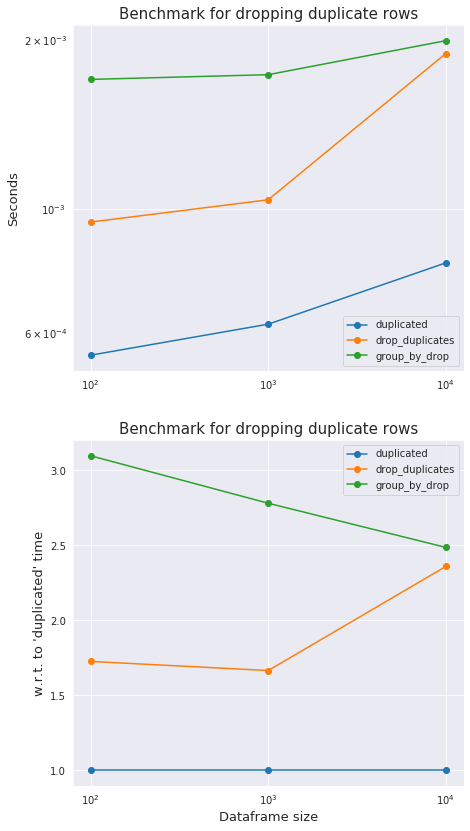

In [16]:
# %load fast_pandas/benchmark_drop.py
from fast_pandas.Benchmarker import Benchmarker  ## Editado


def duplicated(df):
    return df[~df["A"].duplicated(keep="first")].reset_index(drop=True)


def drop_duplicates(df):
    return df.drop_duplicates(subset="A", keep="first").reset_index(drop=True)


def group_by_drop(df):
    return df.groupby(df["A"], as_index=False, sort=False).first()

params = {
    "df_generator": 'pd.DataFrame(np.random.randint(1, df_size, (df_size, 2)), columns=list("AB"))',
    "functions_to_evaluate": [duplicated, drop_duplicates, group_by_drop],
    "title": "Benchmark for dropping duplicate rows",
    "user_df_size_powers": [2, 3, 4]  # Editado manualmente con tal de acelear el proceso
}

benchmark = Benchmarker(**params)
benchmark.benchmark_all()
benchmark.print_results()
benchmark.plot_results()